### PACKAGES

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import numpy as np
from sklearn.utils import shuffle
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

### DEFINE FUNCTIONS

#### timeit wrapper

In [2]:
def timing(f):
    def wrap(*args):
        time1 = time()
        ret = f(*args)
        time2 = time()
        print('{:s} function took {:.3f} ms'.format(f.__name__, (time2-time1)*1000.0))

        return ret
    return wrap

In [3]:
@timing
def run_func():
    print('hi')
run_func()

hi
run_func function took 2.017 ms


### IMPORT DATA

In [4]:
@timing
def import_data():
    
    #converter = lambda x: pd.to_numeric(x, 'coerce')
    #df = pd.read_csv('data\\raw\\PENN_SP500_daily.csv', delim_whitespace=True, converters={1: converter}, header=None)
    df = pd.read_csv('data\\raw\\PENN_SP500_daily.csv')
    #df = shuffle(df, random_state=0)
    df = df[['date',
    'TICKER',
    'COMNAM',
    'BIDLO',
    'ASKHI',
    'PRC',
    'VOL',
    'RET',
    #'BID',
    #'ASK',
    'SHROUT',
    'OPENPRC']]

    return df
    
df = import_data()
df.columns = ['date', 'symbol', 'name', 'bidlo', 'askhi', 'price', 'vol', 'ret', 
              #'bid', 'ask', 
              'sout', 'open']
print('initial shape {}'.format(df.shape))

df.head()

C:\PROGRA1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (5,6,9,19,48,56) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


import_data function took 27300.811 ms
initial shape (2337279, 10)


,date,symbol,name,bidlo,askhi,price,vol,ret,sout,open
0,20000103,ORCL,ORACLE CORP,111.6250,125.1875,118.1250,24831819.0,0.054099,1423672.0,124.62500
1,20000104,ORCL,ORACLE CORP,105.0000,118.6250,107.6875,29568565.0,-0.08836,1423672.0,115.50000
2,20000105,ORCL,ORACLE CORP,96.0000,106.3750,102.0000,42032160.0,-0.052815,1423672.0,101.62500
3,20000106,ORCL,ORACLE CORP,94.6875,105.0000,96.0000,27848885.0,-0.058824,1423672.0,100.15625
4,20000107,ORCL,ORACLE CORP,93.5625,103.5000,103.3750,23218034.0,0.076823,1423672.0,95.00000


### BEGIN CLEANING

### DROP DUPLICATES

In [5]:
print('old shape {}'.format(df.shape))
df = df.drop_duplicates()
print('new shape: {}'.format(df.shape))

old shape (2337279, 10)
new shape: (2337166, 10)


### DROP ROWS WITH WRONG VALUES

In [6]:
"""MESSY DATA"""
indices_to_drop = df[df['ret']=='B'].index
df = df.drop(index=indices_to_drop)

indices_to_drop = df[df['ret']=='C'].index
df = df.drop(index=indices_to_drop)
#print('{} rows were dropped'.format(len(indices_to_drop)))

### STANDARDIZE, FORMALIZE COLUMNS (make into proper datatype)

#### CHANGE date to DATETIME

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')#, errors='ignore')
print(df.shape)
df.head()

(2330557, 10)


,date,symbol,name,bidlo,askhi,price,vol,ret,sout,open
0,2000-01-03,ORCL,ORACLE CORP,111.6250,125.1875,118.1250,24831819.0,0.054099,1423672.0,124.62500
1,2000-01-04,ORCL,ORACLE CORP,105.0000,118.6250,107.6875,29568565.0,-0.08836,1423672.0,115.50000
2,2000-01-05,ORCL,ORACLE CORP,96.0000,106.3750,102.0000,42032160.0,-0.052815,1423672.0,101.62500
3,2000-01-06,ORCL,ORACLE CORP,94.6875,105.0000,96.0000,27848885.0,-0.058824,1423672.0,100.15625
4,2000-01-07,ORCL,ORACLE CORP,93.5625,103.5000,103.3750,23218034.0,0.076823,1423672.0,95.00000


#### CHANGE symbol, name columns to string

In [8]:
df['symbol'] = df['symbol'].astype(str)
df['name'] = df['name'].astype(str)

### CHANGE bidlo, askhi, price, vol, ret, bid, ask, sout, open to FLOAT

In [9]:
df['bidlo'] = df['bidlo'].astype(float)
df['askhi'] = df['askhi'].astype(float)
df['price'] = df['price'].astype(float)
df['vol'] = df['vol'].astype(float)
df['ret'] = df['ret'].astype(float)
#df['bid'] = df['bid'].astype(float)
#df['ask'] = df['ask'].astype(float)
df['sout'] = df['sout'].astype(float)
df['open'] = df['open'].astype(float)

#### CREATE NEW PRIMARY KEY TO BE APPLIED TO EACH TABLE
#### CONCATINATION BETWEEN SYMBOL AND COMPANY NAME

In [10]:
@timing
def create_key():
    key_list = []
    for i in range(len(df)):
        term = str(df.iloc[i, 1])
        if not term:
            value  = '0_'+df.iloc[i, 2]
            key_list.append(value)
        else:
            value = str(df.iloc[i, 1])+'_'+str(df.iloc[i, 2])
            key_list.append(value)

    return key_list

key_list = create_key()
df['key'] = key_list
del key_list

print('The final df has shape {}'.format(df.shape))
df.head()

create_key function took 134649.521 ms
The final df has shape (2330557, 11)


,date,symbol,name,bidlo,askhi,price,vol,ret,sout,open,key
0,2000-01-03,ORCL,ORACLE CORP,111.6250,125.1875,118.1250,24831819.0,0.054099,1423672.0,124.62500,ORCL_ORACLE CORP
1,2000-01-04,ORCL,ORACLE CORP,105.0000,118.6250,107.6875,29568565.0,-0.088360,1423672.0,115.50000,ORCL_ORACLE CORP
2,2000-01-05,ORCL,ORACLE CORP,96.0000,106.3750,102.0000,42032160.0,-0.052815,1423672.0,101.62500,ORCL_ORACLE CORP
3,2000-01-06,ORCL,ORACLE CORP,94.6875,105.0000,96.0000,27848885.0,-0.058824,1423672.0,100.15625,ORCL_ORACLE CORP
4,2000-01-07,ORCL,ORACLE CORP,93.5625,103.5000,103.3750,23218034.0,0.076823,1423672.0,95.00000,ORCL_ORACLE CORP


In [11]:
oknk = pd.read_csv('data\\external\\old_key_new_key.csv')
oknk.head()

,OLD_KEY,NEW_KEY
0,ACN_ACCENTURE LTD BERMUDA,ACN_ACCENTURE
1,ACN_ACCENTURE PLC IRELAND,ACN_ACCENTURE
2,ADBE_ADOBE INC,ADBE_ADOBE
3,ADBE_ADOBE SYSTEMS INC,ADBE_ADOBE
4,BIIB_BIOGEN IDEC INC,BIIB_BIOGEN


In [12]:
df_merge = pd.merge(df, oknk, left_on='key', right_on='OLD_KEY', copy=False)
df_merge = df_merge.drop_duplicates()
#df_merge.index = df_merge['NEW_KEY']
df_merge = df_merge.drop(['key'], axis=1)
df_merge.head()

,date,symbol,name,bidlo,askhi,price,vol,ret,sout,open,OLD_KEY,NEW_KEY
0,2000-01-03,ORCL,ORACLE CORP,111.6250,125.1875,118.1250,24831819.0,0.054099,1423672.0,124.62500,ORCL_ORACLE CORP,ORCL_ORACLE CORP
1,2000-01-04,ORCL,ORACLE CORP,105.0000,118.6250,107.6875,29568565.0,-0.088360,1423672.0,115.50000,ORCL_ORACLE CORP,ORCL_ORACLE CORP
2,2000-01-05,ORCL,ORACLE CORP,96.0000,106.3750,102.0000,42032160.0,-0.052815,1423672.0,101.62500,ORCL_ORACLE CORP,ORCL_ORACLE CORP
3,2000-01-06,ORCL,ORACLE CORP,94.6875,105.0000,96.0000,27848885.0,-0.058824,1423672.0,100.15625,ORCL_ORACLE CORP,ORCL_ORACLE CORP
4,2000-01-07,ORCL,ORACLE CORP,93.5625,103.5000,103.3750,23218034.0,0.076823,1423672.0,95.00000,ORCL_ORACLE CORP,ORCL_ORACLE CORP


#### CREATE LIST OF NEW KEYS

In [13]:
new_key_list = df_merge['NEW_KEY'].unique()
print(len(new_key_list))
new_key_list[0]

712


'ORCL_ORACLE CORP'

In [14]:
print(df.shape)
print(df_merge.shape)

(2330557, 11)
(2330561, 12)


## CREATE TABLES/ENTITIES
###### ...
###### ...

### NAME TABLE

In [15]:
df_name = df_merge[['symbol', 'name', 'NEW_KEY']]
df_name = df_name.drop_duplicates()
df_name.index = df_name['NEW_KEY']
df_name = df_name.drop('NEW_KEY', axis=1)
df_name.to_csv('data\\interim\\df_symbols_names.csv')
df_name.head()

,symbol,name
NEW_KEY,,
ORCL_ORACLE CORP,ORCL,ORACLE CORP
MSFT_MICROSOFT CORP,MSFT,MICROSOFT CORP
TROW_T ROWE PRICE GROUP INC,TROW,T ROWE PRICE ASSOC INC
TROW_T ROWE PRICE GROUP INC,TROW,T ROWE PRICE GROUP INC
HON_HONEYWELL INTERNATIONAL INC,HON,HONEYWELL INTERNATIONAL INC


##### CHECK THE KEYS ARE UNIQUE

In [16]:
num_keys = df_name.index.value_counts().sort_values(ascending=False).sum()
num_rows = df_name.shape[0]

if num_keys == num_rows:
    print("the df are the same:\n{} unique values\n{} rows of name df".format(num_keys , num_rows))
else:
    print('the df values are not the same {} vs. {}'.format(num_keys , num_rows))
    
#df_name.index.value_counts().sort_values(ascending=False)

the df are the same:
847 unique values
847 rows of name df


## UPDATE 1/28 FILTER THE DATAFRAME 1/1/2007 - 12/31/18

In [17]:
print('before format: {}'.format(df_merge.shape))
df_merge = df_merge[(df_merge['date']>='2007-1-1') & (df_merge['date']<='2018-12-31')]
print('after filter: {}'.format(df_merge.shape))
df_merge.head()

before format: (2330561, 12)
after filter: (1487617, 12)


,date,symbol,name,bidlo,askhi,price,vol,ret,sout,open,OLD_KEY,NEW_KEY
1759,2007-01-03,ORCL,ORACLE CORP,17.1000,17.78,17.51,52271846.0,0.021587,5182191.0,17.215,ORCL_ORACLE CORP,ORCL_ORACLE CORP
1760,2007-01-04,ORCL,ORACLE CORP,17.3000,17.87,17.68,34992680.0,0.009709,5182191.0,17.550,ORCL_ORACLE CORP,ORCL_ORACLE CORP
1761,2007-01-05,ORCL,ORACLE CORP,17.4400,17.76,17.64,33812092.0,-0.002262,5182191.0,17.620,ORCL_ORACLE CORP,ORCL_ORACLE CORP
1762,2007-01-08,ORCL,ORACLE CORP,17.4499,17.93,17.86,31018863.0,0.012472,5182191.0,17.630,ORCL_ORACLE CORP,ORCL_ORACLE CORP
1763,2007-01-09,ORCL,ORACLE CORP,17.6500,17.98,17.82,31417003.0,-0.002240,5182191.0,17.930,ORCL_ORACLE CORP,ORCL_ORACLE CORP


#### CREATE LIST OF NEW KEYS

In [18]:
new_key_list = df_merge['NEW_KEY'].unique()
print(len(new_key_list))
new_key_list[0]

592


'ORCL_ORACLE CORP'

### PICK THE COMPANIES THAT ACTUALLY MADE from 1/1/2007-12/31/18

In [19]:
new_key_list = df_merge[df_merge['date'] == '2018-12-31']['NEW_KEY'].unique()
print(len(new_key_list))

501


## CREATE THE TABLES:
- BIDLO/BID
- ASKHI/ASK
- PRICE
- VOLUME
- RETURNS
- OPEN PRICE
- SHARES OUTSTANDING

# (filter out the companies which did not trade daily)
### BIDLO 

In [20]:
@timing
def bidlo_func():

    bidlo_error = []
    df_bidlo = df_merge[['date', 'NEW_KEY', 'bidlo']]
    ########----------------#######
    df_bidlo_temp = pd.DataFrame([])
    #for symbol in list_symbol:
    for symbol in new_key_list:
    #for symbol in error_bidlo:
        try:
            df_temp = df_bidlo[df_bidlo['NEW_KEY']==symbol] ### NO _temp IN THE FILTER
            #print('setting {} date index'.format(symbol))
            df_temp.index=df_temp['date']
            #print('subsetting {} bidlo'.format(symbol))            
            df_temp = df_temp[['bidlo']]
            #print(len(df_temp))
            #print('setting {} transpose'.format(symbol))            
            df_temp = df_temp.T
            #print('changin {} index'.format(symbol))
            df_temp.index = [symbol]
            #df_temp.rename()
            #print('CONCATENATING {}'.format(symbol))
            df_bidlo_temp = pd.concat([df_bidlo_temp, df_temp], axis=0) ### TEMP
            #print('finished with {}\n'.format(symbol))
        except Exception as e:
        #except: 
            #print(symbol, e)
            bidlo_error.append(symbol)
            
    return df_bidlo_temp, bidlo_error
    
df_bidlo, error_bidlo = bidlo_func()
print(len(error_bidlo), df_bidlo.shape)
#pd.Series(error_bidlo).to_csv('data\\interim\\error_bidlo_temp.csv')
df_bidlo.head()

bidlo_func function took 88315.449 ms
12 (489, 3021)


date,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-24,2018-12-26,2018-12-27,2018-12-28,2018-12-31
ORCL_ORACLE CORP,17.10,17.30,17.44,17.4499,17.65,17.5499,17.3500,17.28,17.26,17.279,...,45.53,45.44,45.75000,45.48,43.860,42.68,42.40,43.4600,44.74,44.8400
MSFT_MICROSOFT CORP,29.40,29.44,29.45,29.5300,29.73,29.4300,29.6499,30.64,31.03,31.010,...,101.71,102.52,101.35000,98.78,97.460,93.98,93.96,96.4000,99.52,100.4400
TROW_T ROWE PRICE GROUP INC,45.03,45.57,45.89,45.6400,46.85,46.5200,47.3700,48.05,47.88,48.060,...,90.69,90.33,88.07000,86.91,86.390,84.79,84.59,88.0000,90.68,91.3300
HON_HONEYWELL INTERNATIONAL INC,44.88,44.38,44.29,44.3100,44.67,44.6200,45.1600,45.04,45.22,45.320,...,133.58,134.38,132.14999,129.37,129.330,124.63,123.48,126.8438,130.25,130.4700
ADM_ARCHER DANIELS MIDLAND CO,31.82,31.40,31.36,31.3200,31.15,30.6100,30.2000,30.94,30.46,30.710,...,43.16,42.61,42.10000,40.66,40.525,39.42,39.16,39.7800,40.50,40.5038


#### Error Note
- There are Duplicate dates for each stock in the error dataframe


#### Take LOWEST BIDLO value for each of the duplicated dates
- Same with BID

In [21]:
df_error_bidlo = pd.DataFrame([])

for error_comapny in error_bidlo:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'bidlo']]
    df_error_bidlo = pd.concat([df_error_bidlo, temp_df])

df_error_bidlo = df_error_bidlo.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_bidlo.shape))
df_error_bidlo = df_error_bidlo.groupby(['NEW_KEY', 'date'], sort=False).min()
print('shape after the drop {}'.format(df_error_bidlo.shape))
df_error_bidlo.head()

##########---------------###-------########------------#########

print('before adding error dataframes: {}'.format(df_bidlo.shape))

for symbol in error_bidlo:
    df_temp = df_error_bidlo.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_bidlo = pd.concat([df_bidlo, df_temp], axis=0) ### TEMP
    
print('after adding error dataframes: {}'.format(df_bidlo.shape))
df_bidlo.head()

shape before drop: (51843, 3)
shape after the drop (35285, 1)
before adding error dataframes: (489, 3021)
after adding error dataframes: (501, 3021)


date,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-24,2018-12-26,2018-12-27,2018-12-28,2018-12-31
ORCL_ORACLE CORP,17.10,17.30,17.44,17.4499,17.65,17.5499,17.3500,17.28,17.26,17.279,...,45.53,45.44,45.75000,45.48,43.860,42.68,42.40,43.4600,44.74,44.8400
MSFT_MICROSOFT CORP,29.40,29.44,29.45,29.5300,29.73,29.4300,29.6499,30.64,31.03,31.010,...,101.71,102.52,101.35000,98.78,97.460,93.98,93.96,96.4000,99.52,100.4400
TROW_T ROWE PRICE GROUP INC,45.03,45.57,45.89,45.6400,46.85,46.5200,47.3700,48.05,47.88,48.060,...,90.69,90.33,88.07000,86.91,86.390,84.79,84.59,88.0000,90.68,91.3300
HON_HONEYWELL INTERNATIONAL INC,44.88,44.38,44.29,44.3100,44.67,44.6200,45.1600,45.04,45.22,45.320,...,133.58,134.38,132.14999,129.37,129.330,124.63,123.48,126.8438,130.25,130.4700
ADM_ARCHER DANIELS MIDLAND CO,31.82,31.40,31.36,31.3200,31.15,30.6100,30.2000,30.94,30.46,30.710,...,43.16,42.61,42.10000,40.66,40.525,39.42,39.16,39.7800,40.50,40.5038


#### FILTER OUT  THE STOCKS THAT TRADED EVERY DAY FROM 1/1/2007 - 12/31/18

In [22]:
df_bidlo.T['ORCL_ORACLE CORP'].isnull().sum()

0

(array([410.,  10.,   9.,  13.,   9.,  13.,   9.,  13.,   7.,   8.]),
 array([   0. ,  298.1,  596.2,  894.3, 1192.4, 1490.5, 1788.6, 2086.7,
        2384.8, 2682.9, 2981. ]),
 <a list of 10 Patch objects>)

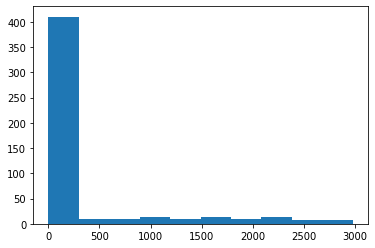

In [23]:
keep_list = []
null_list = []
for symbol in new_key_list:
    temp_value = df_bidlo.T[symbol].isnull().sum()
    null_list.append(temp_value)
    if temp_value == 0:
        keep_list.append(symbol)
    
plt.hist(null_list)

In [24]:
pd.Series(null_list).value_counts().sort_values(ascending=False)

0       388
1         6
62        2
2         2
1634      2
       ... 
2529      1
997       1
1511      1
1009      1
1252      1
Length: 106, dtype: int64

# create list of companies that actually traded during the trading period

In [25]:
new_key_list = keep_list

# Begin HERE

### BIDLO (with continuously traded companies filtered out)

In [26]:
@timing
def bidlo_func():

    bidlo_error = []
    df_bidlo = df_merge[['date', 'NEW_KEY', 'bidlo']]
    ########----------------#######
    df_bidlo_temp = pd.DataFrame([])
    #for symbol in list_symbol:
    for symbol in new_key_list:
    #for symbol in error_bidlo:
        try:
            df_temp = df_bidlo[df_bidlo['NEW_KEY']==symbol] ### NO _temp IN THE FILTER
            #print('setting {} date index'.format(symbol))
            df_temp.index=df_temp['date']
            #print('subsetting {} bidlo'.format(symbol))            
            df_temp = df_temp[['bidlo']]
            #print(len(df_temp))
            #print('setting {} transpose'.format(symbol))            
            df_temp = df_temp.T
            #print('changin {} index'.format(symbol))
            df_temp.index = [symbol]
            #df_temp.rename()
            #print('CONCATENATING {}'.format(symbol))
            df_bidlo_temp = pd.concat([df_bidlo_temp, df_temp], axis=0) ### TEMP
            #print('finished with {}\n'.format(symbol))
        except Exception as e:
        #except: 
            #print(symbol, e)
            bidlo_error.append(symbol)
            
    return df_bidlo_temp, bidlo_error
    
df_bidlo, error_bidlo = bidlo_func()
print(len(error_bidlo), df_bidlo.shape)
#pd.Series(error_bidlo).to_csv('data\\interim\\error_bidlo_temp.csv')
df_bidlo.head()

bidlo_func function took 63482.712 ms
7 (381, 3021)


date,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-24,2018-12-26,2018-12-27,2018-12-28,2018-12-31
ORCL_ORACLE CORP,17.10,17.30,17.44,17.4499,17.65,17.5499,17.3500,17.28,17.26,17.279,...,45.53,45.44,45.75000,45.48,43.860,42.68,42.40,43.4600,44.74,44.8400
MSFT_MICROSOFT CORP,29.40,29.44,29.45,29.5300,29.73,29.4300,29.6499,30.64,31.03,31.010,...,101.71,102.52,101.35000,98.78,97.460,93.98,93.96,96.4000,99.52,100.4400
TROW_T ROWE PRICE GROUP INC,45.03,45.57,45.89,45.6400,46.85,46.5200,47.3700,48.05,47.88,48.060,...,90.69,90.33,88.07000,86.91,86.390,84.79,84.59,88.0000,90.68,91.3300
HON_HONEYWELL INTERNATIONAL INC,44.88,44.38,44.29,44.3100,44.67,44.6200,45.1600,45.04,45.22,45.320,...,133.58,134.38,132.14999,129.37,129.330,124.63,123.48,126.8438,130.25,130.4700
ADM_ARCHER DANIELS MIDLAND CO,31.82,31.40,31.36,31.3200,31.15,30.6100,30.2000,30.94,30.46,30.710,...,43.16,42.61,42.10000,40.66,40.525,39.42,39.16,39.7800,40.50,40.5038


#### Error Note
- There are Duplicate dates for each stock in the error dataframe


#### Take LOWEST BIDLO value for each of the duplicated dates
- Same with BID

In [27]:
df_error_bidlo = pd.DataFrame([])

for error_comapny in error_bidlo:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'bidlo']]
    df_error_bidlo = pd.concat([df_error_bidlo, temp_df])

df_error_bidlo = df_error_bidlo.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_bidlo.shape))
df_error_bidlo = df_error_bidlo.groupby(['NEW_KEY', 'date'], sort=False).min()
print('shape after the drop {}'.format(df_error_bidlo.shape))
df_error_bidlo.head()

##########---------------###-------########------------#########

print('before adding error dataframes: {}'.format(df_bidlo.shape))

for symbol in error_bidlo:
    df_temp = df_error_bidlo.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_bidlo = pd.concat([df_bidlo, df_temp], axis=0) ### TEMP
    
print('after adding error dataframes: {}'.format(df_bidlo.shape))
df_bidlo.head()

shape before drop: (37158, 3)
shape after the drop (21140, 1)
before adding error dataframes: (381, 3021)
after adding error dataframes: (388, 3021)


date,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-24,2018-12-26,2018-12-27,2018-12-28,2018-12-31
ORCL_ORACLE CORP,17.10,17.30,17.44,17.4499,17.65,17.5499,17.3500,17.28,17.26,17.279,...,45.53,45.44,45.75000,45.48,43.860,42.68,42.40,43.4600,44.74,44.8400
MSFT_MICROSOFT CORP,29.40,29.44,29.45,29.5300,29.73,29.4300,29.6499,30.64,31.03,31.010,...,101.71,102.52,101.35000,98.78,97.460,93.98,93.96,96.4000,99.52,100.4400
TROW_T ROWE PRICE GROUP INC,45.03,45.57,45.89,45.6400,46.85,46.5200,47.3700,48.05,47.88,48.060,...,90.69,90.33,88.07000,86.91,86.390,84.79,84.59,88.0000,90.68,91.3300
HON_HONEYWELL INTERNATIONAL INC,44.88,44.38,44.29,44.3100,44.67,44.6200,45.1600,45.04,45.22,45.320,...,133.58,134.38,132.14999,129.37,129.330,124.63,123.48,126.8438,130.25,130.4700
ADM_ARCHER DANIELS MIDLAND CO,31.82,31.40,31.36,31.3200,31.15,30.6100,30.2000,30.94,30.46,30.710,...,43.16,42.61,42.10000,40.66,40.525,39.42,39.16,39.7800,40.50,40.5038


In [32]:
df_bidlo.to_csv('data\\external\\temp_bidlo.csv')

# CHECK WHETEHR THE DUPLICATE COLUM NEEDS TO BE MAXIMIZED OR DROPPED!

### ASKHI TABLE

In [29]:
@timing
def askhi_func():
    error_askhi = []
    df_askhi = df_merge[['date', 'NEW_KEY', 'askhi']]
    df_askhi_temp = pd.DataFrame([])
    
    for symbol in new_key_list:
        try:
            df_temp = df_askhi[df_askhi['NEW_KEY']==symbol]
            df_temp.index=df_temp['date']
            df_temp = df_temp[['askhi']]
            df_temp = df_temp.T
            df_temp.index = [symbol]
            df_askhi_temp = pd.concat([df_askhi_temp, df_temp], axis=0)

        #except:
        except Exception as e:
            #print(symbol, e)
            error_askhi.append(symbol)
    return df_askhi_temp, error_askhi

df_askhi, error_askhi = askhi_func()
print(len(error_askhi), df_askhi.shape)
#pd.Series(error_askhi).to_csv('..\data\\error_askhi.csv')
#df_askhi.head(2)

askhi_func function took 31545.447 ms
7 (381, 3021)


### Take the error dataframe and filter out the highest ASKHI value for each of the days of each of the companies
- Same with ASK

In [30]:
df_error_askhi = pd.DataFrame([])

for error_comapny in error_askhi:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'askhi']]
    df_error_askhi = pd.concat([df_error_askhi, temp_df])

df_error_askhi = df_error_askhi.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_askhi.shape))
"""TAKE THE MAX ASKHI"""
df_error_askhi = df_error_askhi.groupby(['NEW_KEY', 'date'], sort=False).max()
print('shape after the drop {}'.format(df_error_askhi.shape))
#df_error_askhi.head()

#######----------#############-------------########
print('before adding error dataframes: {}'.format(df_askhi.shape))

for symbol in error_askhi:
    df_temp = df_error_askhi.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_askhi = pd.concat([df_askhi, df_temp], axis=0) ### TEMP
    
print('after adding error dataframes: {}'.format(df_askhi.shape))
df_askhi.head()

shape before drop: (37158, 3)
shape after the drop (21140, 1)
before adding error dataframes: (381, 3021)
after adding error dataframes: (388, 3021)


date,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-24,2018-12-26,2018-12-27,2018-12-28,2018-12-31
ORCL_ORACLE CORP,17.78,17.87,17.76,17.93,17.98,17.80,17.81,17.550,17.4801,17.71,...,47.23000,48.34000,47.44000,46.95,46.21,43.82000,44.61000,45.09,45.76500,45.50
MSFT_MICROSOFT CORP,30.25,29.97,29.75,30.10,30.18,29.89,30.75,31.390,31.4500,31.44,...,105.80000,104.51000,106.88000,104.31,103.00,97.97000,100.69000,101.19,102.41000,102.40
TROW_T ROWE PRICE GROUP INC,46.25,46.32,46.38,47.01,47.54,47.44,48.37,48.608,48.8200,48.56,...,93.32520,92.64000,92.12000,88.99,90.33,87.53250,89.73000,91.37,92.42000,92.69
HON_HONEYWELL INTERNATIONAL INC,45.69,45.21,45.11,45.05,45.33,45.09,45.99,45.700,45.7100,45.90,...,137.17999,136.75999,137.75999,133.62,132.45,128.99001,129.60001,131.63,133.07001,132.16
ADM_ARCHER DANIELS MIDLAND CO,32.76,32.09,31.88,32.05,31.95,31.47,32.00,32.440,31.3100,31.38,...,44.49000,43.99000,43.56000,42.25,41.77,40.70000,40.69000,40.97,41.49000,41.04


In [31]:
df_askhi.to_csv('data\\external\\temp_askhi.csv')

### PRICE TABLE

In [ ]:
@timing
def price_func():
    error_price = []
    
    df_price = df_merge[['date', 'NEW_KEY', 'price']]
    ########----------------#######
    df_price_temp = pd.DataFrame([])
    for symbol in new_key_list:
        try:
            df_temp = df_price[df_price['NEW_KEY']==symbol] ### NO _temp IN THE FILTER
            df_temp.index=df_temp['date']
            df_temp = df_temp[['price']]
            df_temp = df_temp.T
            df_temp.index = [symbol]
            #df_temp.rename()
            df_price_temp = pd.concat([df_price_temp, df_temp], axis=0) ### TEMP
        except Exception as e:
            #print(symbol, e)
            error_price.append(symbol)
    return df_price_temp, error_price

df_price, error_price = price_func()
print(len(error_price), df_price.shape)
#pd.Series(error_price).to_csv('..\data\\error_price.csv')
#df_price.head(2)

##### take MAX price

In [ ]:
df_error_price = pd.DataFrame([])

for error_comapny in error_price:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'price']]
    df_error_price = pd.concat([df_error_price, temp_df])

df_error_price = df_error_price.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_price.shape))
"""TAKE THE MAX PRICE"""
df_error_price = df_error_price.groupby(['NEW_KEY', 'date'], sort=False).max()
print('shape after the drop {}'.format(df_error_price.shape))
#df_error_askhi.head()

#######----------#############-------------########
print('before adding error dataframes: {}'.format(df_price.shape))

for symbol in error_askhi:
    df_temp = df_error_price.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_price = pd.concat([df_price, df_temp], axis=0) ### TEMP

    
"""DROP DUPLICATES"""
df_price = df_price.drop_duplicates()    
print('after adding error dataframes: {}'.format(df_price.shape))
df_price.head()

### VOLUME TABLE

In [ ]:
@timing
def volume_func():
    error_volume = []
    
    df_volume = df_merge[['date', 'NEW_KEY', 'vol']]
    ########----------------#######
    df_volume_temp = pd.DataFrame([])
    for symbol in new_key_list:
        try:            
            df_temp = df_volume[df_volume['NEW_KEY']==symbol] ### NO _temp IN THE FILTER
            df_temp.index=df_temp['date']
            df_temp = df_temp[['vol']]
            df_temp = df_temp.T
            df_temp.index = [symbol]
            #df_temp.rename()
            df_volume_temp = pd.concat([df_volume_temp, df_temp], axis=0) ### TEMP    
        except:
            error_volume.append(symbol)
    return df_volume_temp, error_volume

df_volume, error_volume = volume_func()
print(len(error_volume), df_volume.shape)
#pd.Series(error_volume).to_csv('..\data\\error_volume.csv')
#df_volume.head(2)        

##### take MAX volume

In [ ]:
df_error_volume = pd.DataFrame([])

for error_comapny in error_volume:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'vol']]
    df_error_volume = pd.concat([df_error_volume, temp_df])

df_error_volume = df_error_volume.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_volume.shape))
"""TAKE THE MAX PRICE"""
df_error_volume = df_error_volume.groupby(['NEW_KEY', 'date'], sort=False).max()
print('shape after the drop {}'.format(df_error_volume.shape))
#df_error_askhi.head()

#######----------#############-------------########
print('before adding error dataframes: {}'.format(df_volume.shape))

for symbol in error_volume:
    df_temp = df_error_volume.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_volume = pd.concat([df_volume, df_temp], axis=0) ### TEMP

    
"""DROP DUPLICATES"""
df_volume = df_volume.drop_duplicates()    
print('after adding error dataframes: {}'.format(df_volume.shape))
df_volume.head()

### RETURNS TABLE

In [ ]:
@timing
def returns_func():
    error_returns = []
    df_return = df_merge[['date', 'NEW_KEY', 'ret']]
    ########----------------#######
    df_return_temp = pd.DataFrame([])
    for symbol in new_key_list:
        try:
            df_temp = df_return[df_return['NEW_KEY']==symbol] ### NO _temp IN THE FILTER
            df_temp.index=df_temp['date']
            df_temp = df_temp[['ret']]
            df_temp = df_temp.T
            df_temp.index = [symbol]
            #df_temp.rename()
            df_return_temp = pd.concat([df_return_temp, df_temp], axis=0) ### TEMP
        except:
            error_returns.append(symbol)
    return df_return_temp, error_returns

df_returns, error_returns = returns_func()
print(len(error_returns), df_returns.shape)
#pd.Series(error_returns).to_csv('..\data\\error_returns.csv')
#df_returns.head(2)            

##### take max RETUNRS 

In [ ]:
df_error_returns = pd.DataFrame([])

for error_comapny in error_returns:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'ret']]
    df_error_returns = pd.concat([df_error_returns, temp_df])

df_error_returns = df_error_returns.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_returns.shape))
"""TAKE THE MAX PRICE"""
df_error_returns = df_error_returns.groupby(['NEW_KEY', 'date'], sort=False).max()
print('shape after the drop {}'.format(df_error_returns.shape))
#df_error_askhi.head()

#######----------#############-------------########
print('before adding error dataframes: {}'.format(df_returns.shape))

for symbol in error_returns:
    df_temp = df_error_returns.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_returns = pd.concat([df_returns, df_temp], axis=0) ### TEMP

    
"""DROP DUPLICATES"""
df_returns = df_returns.drop_duplicates()    
print('after adding error dataframes: {}'.format(df_returns.shape))
df_returns.head()

In [ ]:
# df_returns.to_csv('data\\external\\df_returns_check.csv')

### SHARES OUTSTANDING TABLE

In [ ]:
@timing
def shares_out_func():
    error_shares_out = []
    df_shares_out = df_merge[['date', 'NEW_KEY', 'sout']]
    ########----------------#######
    df_shares_out_temp = pd.DataFrame([])
    for symbol in new_key_list:
        try:
            df_temp = df_shares_out[df_shares_out['NEW_KEY']==symbol] ### NO _temp IN THE FILTER
            df_temp.index=df_temp['date']
            df_temp = df_temp[['sout']] 
            df_temp = df_temp.T
            df_temp.index = [symbol]
            #df_temp.rename()
            df_shares_out_temp = pd.concat([df_shares_out_temp, df_temp], axis=0) ### TEMP    
        except:
            error_shares_out.append(symbol)
    return df_shares_out_temp, error_shares_out

df_shares_out, error_shares_out = shares_out_func()
print(len(error_shares_out), df_shares_out.shape)
#pd.Series(error_shares_out).to_csv('..\data\\error_shares_out.csv')
#df_shares_out.head(2)                  

### take MAX shares outstanding

In [ ]:
df_error_shares_out = pd.DataFrame([])

for error_comapny in error_shares_out:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'sout']]
    df_error_shares_out = pd.concat([df_error_shares_out, temp_df])

df_error_shares_out = df_error_shares_out.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_shares_out.shape))
"""TAKE THE MAX PRICE"""
df_error_shares_out = df_error_shares_out.groupby(['NEW_KEY', 'date'], sort=False).max()
print('shape after the drop {}'.format(df_error_shares_out.shape))
#df_error_askhi.head()

#######----------#############-------------########
print('before adding error dataframes: {}'.format(df_shares_out.shape))

for symbol in error_shares_out:
    df_temp = df_error_shares_out.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_shares_out = pd.concat([df_shares_out, df_temp], axis=0) ### TEMP

    
"""DROP DUPLICATES"""
df_shares_out = df_shares_out.drop_duplicates()    
print('after adding error dataframes: {}'.format(df_shares_out.shape))
df_shares_out.head()

### BID/ASK SPREAD TABLE

In [ ]:
df_spread = df_askhi - df_bidlo

### MARKET CAP TABLE

In [ ]:
df_market_cap = df_shares_out*df_price

##### GENERATE LIST OF DATAFRAMES

In [ ]:
df_list = [df_bidlo, df_askhi, df_price, df_volume, df_returns, df_spread, df_market_cap]
df_name_list = ['df_bidlo', 'df_askhi', 'df_price', 'df_volume', 'df_returns', 'df_spread', 'df_market_cap']

## SEPERATE Out shares out!
## just drop the duplicate column!

In [ ]:
df_list = [df_shares_out]
df_name_list = ['df_shares_out']

In [ ]:
df_shares_out = df_shares_out.loc[:,~df_shares_out.columns.duplicated()]
df_shares_out.shape

### There was a duplicte row value for JCI_JOHNSON CONTROLS INTL PLC, so we dropped it (not needed in updated 07-18)

In [ ]:
new_df_list = []

In [ ]:
# EXCEPT FOR DF_SHARESOUT

In [ ]:
for i in range(len(df_list)):
    temp_name = df_name_list[i]:
        if 
    temp_value = df_list[i].loc['PLD_PROLOGIS TRUST', '2011-06-03'].max()
    df_list[i].loc['PLD_PROLOGIS TRUST', '2011-06-03'] = temp_value
    
    temp_df = df_list[i].T.drop_duplicates()
    #print(temp_df.head())
    new_df_list.append(temp_df.T)
    print(df_name_list[i])

### CHECK TO MAKE SURE THE DUPLICATE VALUES HAVE BEEN SUBMITTED

In [ ]:
new_df_list[0].loc['PLD_PROLOGIS TRUST', '2011-06-03']

In [ ]:
df_list[0].to_csv('data\\external\\temp_sout.csv')

#### now that the new df list is completed, drop the old one with the duplicate values and append the new one to AWS

In [ ]:
del df_list

### UPLOAD THE DATA INTO THE S3 BUCKET

##### READ CREDENTIALS TEXT FILE
##### CREDENTIALS BELONG TO "capstoner" user role in AWS

In [ ]:
import boto3
from botocore.client import Config
import os
#os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('C:\\Users\\A Sua\\Documents\\AWS\\credentials\\capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()

location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
BUCKET_NAME = 'capstonefiu2020-data'

In [ ]:
@timing
def upload_PENN_to_aws():
    for i in range(len(new_df_list)):
        path_to_df = 'data\\processed\\{}_07_18.csv'.format(df_name_list[i])
        new_df_list[i].to_csv(path_to_df)
        
        ## open file
        temp_data = open(path_to_df, 'rb')
        
        ### instantiate s3 client
        s3 = boto3.resource('s3', 
                  aws_access_key_id = AWS_ACCESS_KEY_ID,
                   aws_secret_access_key=AWS_SECRET_ACCESS_KEY)
        s3.Bucket(BUCKET_NAME).put_object(Key='data/processed/{}07_18.csv'.format(df_name_list[i]), Body=temp_data)
        
        ### close the file
        temp_data.close()
        os.remove(path_to_df)
        print('{} added to cloud'.format(df_name_list[i]))
    print('finished uploading dataframes')
    
upload_PENN_to_aws()

### upload sharesout to AWS seperately

In [ ]:
path_to_df = 'data\\processed\\{}_07_18.csv'.format('df_shares_out')
df_shares_out.to_csv(path_to_df)
print(df_shares_out.shape)

## open file
temp_data = open(path_to_df, 'rb')

### instantiate s3 client
s3 = boto3.resource('s3', 
          aws_access_key_id = AWS_ACCESS_KEY_ID,
           aws_secret_access_key=AWS_SECRET_ACCESS_KEY)
s3.Bucket(BUCKET_NAME).put_object(Key='data/processed/{}07_18.csv'.format(df_name_list[0]), Body=temp_data)

### close the file
temp_data.close()
os.remove(path_to_df)
print('{} added to cloud'.format(df_name_list[0]))
print('finished uploading dataframes')